# Chapter 3: Building Your First Dataset

## 3.3 Tensors, Devices, and CUDA

### 3.3.1 Scalars

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/spreadsheet_cell.png)

In [65]:
import torch
scalar = torch.tensor(18)
scalar

tensor(18)

### 3.3.2 Vectors

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/spreadsheet_column.png)

In [66]:
vector = torch.tensor([18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14])
vector

tensor([18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14])

### 3.3.3 Matrices

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/spreadsheet_table.png)

In [67]:
matrix = torch.tensor([[ 18,  15,  18,  16,  17,  15,  14,  14,  14,  15,  15,  14,  15,  14],
                       [130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160, 150, 225]])
matrix

tensor([[ 18,  15,  18,  16,  17,  15,  14,  14,  14,  15,  15,  14,  15,  14],
        [130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160, 150, 225]])

### 3.3.4 Tensors

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/stack_tensor.png)

In [68]:
matrix_of_ones = torch.ones((2, 3), dtype=torch.float)
random_tensor = torch.randn((2, 3, 4), dtype=torch.float)

In [69]:
vector.shape, vector.size()

(torch.Size([14]), torch.Size([14]))

In [70]:
scalar.size()

torch.Size([])

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/tensors.png)

### 3.3.5 Numpy

In [71]:
import numpy as np
numpy_array = vector.numpy()
numpy_array

array([18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14])

In [9]:
back_to_tensor = torch.as_tensor(numpy_array)
back_to_tensor

tensor([18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14])

### 3.3.6 Reshaping Tensors

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/flatten.png)
   

#### 3.3.6.1 Avoiding copies

In [10]:
original_tensor = torch.ones((2, 3), dtype=torch.float)
reshaped_tensor = original_tensor.view(1, 6)

In [11]:
original_tensor, reshaped_tensor

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[1., 1., 1., 1., 1., 1.]]))

#### 3.3.6.2 Sharing Underlying Data

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/memory.png)

In [12]:
original_tensor[0, 1] = 2

In [13]:
original_tensor, reshaped_tensor

(tensor([[1., 2., 1.],
         [1., 1., 1.]]),
 tensor([[1., 2., 1., 1., 1., 1.]]))

In [14]:
numpy_array[-1] = 1000

In [15]:
numpy_array, vector

(array([  18,   15,   18,   16,   17,   15,   14,   14,   14,   15,   15,
          14,   15, 1000]),
 tensor([  18,   15,   18,   16,   17,   15,   14,   14,   14,   15,   15,   14,
           15, 1000]))

In [16]:
cloned_tensor = original_tensor.clone()

In [17]:
cloned_tensor

tensor([[1., 2., 1.],
        [1., 1., 1.]])

In [18]:
original_tensor[0, 1] = 3

In [19]:
original_tensor, cloned_tensor

(tensor([[1., 3., 1.],
         [1., 1., 1.]]),
 tensor([[1., 2., 1.],
         [1., 1., 1.]]))

#### 3.3.6.3 Contiguous Tensors

In [20]:
transposed_tensor = original_tensor.t()
transposed_tensor.view(1, 6)

RuntimeError: ignored

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/contiguous.png)

In [23]:
original_tensor.stride(), transposed_tensor.stride()

((3, 1), (1, 3))

In [24]:
transposed_tensor.is_contiguous(), original_tensor.is_contiguous()

(False, True)

In [25]:
transposed_tensor

tensor([[1., 1.],
        [3., 1.],
        [1., 1.]])

In [26]:
transposed_tensor.contiguous().view(1, 6)

tensor([[1., 1., 3., 1., 1., 1.]])

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/contiguous2.png)

In [27]:
transposed_tensor.flatten()

tensor([1., 1., 3., 1., 1., 1.])

### 3.3.7 Named Tensors

#### 3.3.7.1 Broadcasting

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/broadcasting_1.png)
*Source: https://numpy.org/doc/stable/user/basics.broadcasting.html*

In [28]:
mat1 = torch.ones((3, 3))
mat2 = torch.tensor([[1, 2, 3]])
mat1, mat2

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[1, 2, 3]]))

In [29]:
mat1 * mat2

tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])

In [30]:
mat1.size(), mat2.size()

(torch.Size([3, 3]), torch.Size([1, 3]))

In [31]:
mat2_wrong_shape = mat2.t()
mat1 * mat2_wrong_shape

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]])

In [32]:
named_mat1 = torch.ones((3, 3), names=['R', 'C'])
named_mat2 = torch.tensor([[1, 2, 3]], names=['R', 'C'])

<ipython-input-32-607113069adf>:1: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at ../c10/core/TensorImpl.h:1788.)
  named_mat1 = torch.ones((3, 3), names=['R', 'C'])


In [33]:
named_mat1 * named_mat2

tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]], names=('R', 'C'))

In [34]:
named_mat1 * named_mat2.t()

RuntimeError: ignored

In [35]:
named_mat1 * mat2.t()

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]], names=('R', 'C'))

### 3.3.8 Devices

In [36]:
device = original_tensor.device
device

device(type='cpu')

#### 3.3.8.1 GPU

In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [38]:
sent_tensor = original_tensor.to(device)
sent_tensor.device

device(type='cuda', index=0)

In [39]:
sent_tensor.type()

'torch.cuda.FloatTensor'

In [40]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

Tesla T4


In [41]:
sent_tensor.numpy()

TypeError: ignored

In [42]:
sent_tensor.cpu().numpy()

array([[1., 3., 1.],
       [1., 1., 1.]], dtype=float32)

#### 3.3.8.2 TPU

In [44]:
# import torch_xla.core.xla_model as xm

In [45]:
# device = xm.xla_device()

In [46]:
# tpu_tensor1 = torch.ones(2, 3, device=dev)
# tpu_tensor1

```
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='xla:1')
```

In [47]:
# device2 = xm.xla_device(n=2, devkind='TPU')
# tpu_tensor2 = torch.zeros(2, 3, device=device2)
# tpu_tensor2

```
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='xla:2')
```

TPUs can be used to speed up training even more by using all its cores at once through multiprocessing.

#### 3.3.8.3 "Meta" (Fake)

In [48]:
meta_tensor = torch.zeros(2, 3, device='meta')
meta_tensor

tensor(..., device='meta', size=(2, 3))

In [49]:
huge_tensor = torch.zeros(100000, 100000, device='meta')
huge_tensor

tensor(..., device='meta', size=(100000, 100000))

In [50]:
# huge_tensor = torch.zeros(100000, 100000)

```
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
Cell In[2], line 2
      1 import torch
----> 2 huge_tensor = torch.zeros(100000, 100000)

RuntimeError: [enforce fail at alloc_cpu.cpp:75] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 40000000000 bytes. Error code 12 (Cannot allocate memory)
```

## 3.4 Datasets

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step1.png)

In [2]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cyl', 'disp', 'hp', 'weight', 'acc', 'year', 'origin']

df = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
df

,mpg,cyl,disp,hp,weight,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [3]:
df['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [5]:
df['mpg'].values[:5]

array([18., 15., 18., 16., 17.])

In [6]:
df[['mpg', 'hp']]

,mpg,hp
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
393,27.0,86.0
394,44.0,52.0
395,32.0,84.0
396,28.0,79.0


In [9]:
df[['mpg', 'hp']].values[:5]

array([[ 18., 130.],
       [ 15., 165.],
       [ 18., 150.],
       [ 16., 150.],
       [ 17., 140.]])

In [11]:
df.iloc[:5]

,mpg,cyl,disp,hp,weight,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [17]:
cond = (df['year'] == 70)
df[cond]

,mpg,cyl,disp,hp,weight,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


### 3.4.1 Train-Validation-Test Split

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step1.png)
    
![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch1/train_test_split.png)

#### 3.4.1.1 Shuffling

In [42]:
df['year'].values[:50]

array([70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71,
       71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71])

In [48]:
shuffled = df.sample(frac=1, random_state=1).reset_index(drop=True)

In [49]:
from sklearn.model_selection import train_test_split

trainval, test = train_test_split(shuffled, test_size=0.16, shuffle=False)
train, val = train_test_split(trainval, test_size=0.2, shuffle=False)

### 3.4.2 Cleaning Data

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step2.png)

In [50]:
is_missing_attr = train.isna()
n_missing_attr = is_missing_attr.sum(axis=1)
train[n_missing_attr > 0]

,mpg,cyl,disp,hp,weight,acc,year,origin
89,34.5,4,100.0,NaN,2320.0,15.8,81,2
208,25.0,4,98.0,NaN,2046.0,19.0,71,1
211,40.9,4,85.0,NaN,1835.0,17.3,80,2


In [51]:
train.dropna(inplace=True)
train

,mpg,cyl,disp,hp,weight,acc,year,origin
0,18.0,6,171.0,97.0,2984.0,14.5,75,1
1,28.1,4,141.0,80.0,3230.0,20.4,81,2
2,19.4,8,318.0,140.0,3735.0,13.2,78,1
3,20.3,5,131.0,103.0,2830.0,15.9,78,2
4,20.2,6,232.0,90.0,3265.0,18.2,79,1
...,...,...,...,...,...,...,...,...
262,26.0,4,91.0,70.0,1955.0,20.5,71,1
263,26.4,4,140.0,88.0,2870.0,18.1,80,1
264,31.9,4,89.0,71.0,1925.0,14.0,79,2
265,19.2,8,267.0,125.0,3605.0,15.0,79,1


In [52]:
val.dropna(inplace=True)
test.dropna(inplace=True)

### 3.4.3 Continuous Attributes

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step3.png)

In [53]:
cont_attr = ['mpg', 'disp', 'hp', 'weight', 'acc']

array([[<AxesSubplot:title={'center':'disp'}>,
        <AxesSubplot:title={'center':'hp'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acc'}>]], dtype=object)

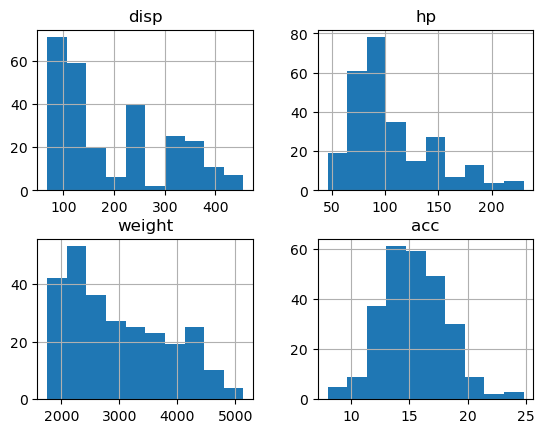

In [54]:
train_features = train[cont_attr[1:]]
train_features.hist()

In [137]:
train_means = train_features.mean()
train_standard_deviations = train_features.std()
train_means, train_standard_deviations

(disp       195.456439
 hp         105.087121
 weight    2984.075758
 acc         15.432955
 dtype: float64,
 disp      106.255830
 hp         39.017837
 weight    869.802063
 acc         2.743941
 dtype: float64)

In [138]:
train_standardized_features = (train_features - train_means)/train_standard_deviations
train_standardized_features.mean(), train_standardized_features.std()

(disp     -7.906134e-17
 hp       -2.010177e-16
 weight    6.308085e-17
 acc      -2.228857e-16
 dtype: float64,
 disp      1.0
 hp        1.0
 weight    1.0
 acc       1.0
 dtype: float64)

array([[<AxesSubplot:title={'center':'disp'}>,
        <AxesSubplot:title={'center':'hp'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acc'}>]], dtype=object)

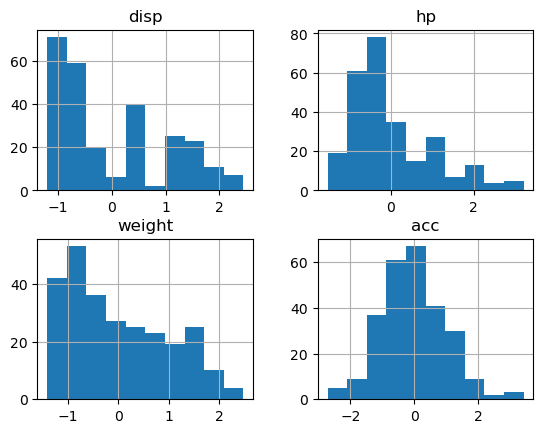

In [129]:
train_standardized_features.hist()

In [130]:
val_features = val[cont_attr[1:]]
val_standardized_features = (val_features - train_means)/train_standard_deviations
val_standardized_features.mean(), val_standardized_features.std()

(disp     -0.089282
 hp       -0.151349
 weight   -0.121501
 acc       0.139288
 dtype: float64,
 disp      0.946465
 hp        0.917051
 weight    0.918898
 acc       0.958077
 dtype: float64)

In [131]:
test_features = test[cont_attr[1:]]
test_standardized_features = (test_features - train_means)/train_standard_deviations

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_features.values)

StandardScaler()

In [134]:
scaler.mean_, scaler.var_

(array([ 195.45643939,  105.08712121, 2984.07575758,   15.43295455]),
 array([1.12475350e+04, 1.51662499e+03, 7.53689888e+05, 7.50069430e+00]))

In [ ]:
standardized_data = {}
standardized_data['train'] = scaler.transform(train_features)
standardized_data['val'] = scaler.transform(val_features)
standardized_data['test'] = scaler.transform(test_features)

In [92]:
from sklearn.preprocessing import StandardScaler

def standardize(df, cont_attr, scaler=None):
    cont_X = df[cont_attr].values
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(cont_X)
    cont_X = scaler.transform(cont_X)
    cont_X = torch.as_tensor(cont_X, dtype=torch.float32)
    return cont_X, scaler

In [147]:
standardized_data = {}
# The training set is used to fit a scaler
standardized_data['train'], scaler = standardize(train_features, cont_attr[1:])
# The scaler is used as argument to the other datasets
standardized_data['val'], _ = standardize(val_features, cont_attr[1:], scaler)
standardized_data['test'], _ = standardize(test_features, cont_attr[1:], scaler)

### 3.4.4 Discrete and Categorical Attributes

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step3.png)

In [100]:
cyls = sorted(train['cyl'].unique())
cyls

[3, 4, 5, 6, 8]

In [101]:
cyls_map = dict((v, i) for i, v in enumerate(cyls))
cyls_map

{3: 0, 4: 1, 5: 2, 6: 3, 8: 4}

In [102]:
n_dim = 8
lookup_table = torch.randn((len(cyls), n_dim))
lookup_table

tensor([[-1.2618, -1.9077,  1.7610, -0.3911, -1.5965, -1.5291,  0.9502, -1.2053],
        [ 0.1047, -0.9880,  1.3985, -0.6481, -0.4341,  1.1003,  0.1651, -0.1110],
        [ 1.0780,  0.7824,  1.3031,  0.8663, -2.1158, -0.9377,  0.4476,  0.2316],
        [ 0.4744,  0.0755,  0.0135, -0.2144,  0.5333,  0.3019, -1.2415, -0.2738],
        [ 0.0871,  0.8316, -0.5236,  1.4037, -1.0974, -0.6505, -3.6005,  1.4221]])

In [103]:
idx = cyls_map[6]
lookup_table[idx]

tensor([ 0.4744,  0.0755,  0.0135, -0.2144,  0.5333,  0.3019, -1.2415, -0.2738])

In [104]:
import torch.nn as nn

emb_table = nn.Embedding(len(cyls), n_dim)

In [105]:
idx = cyls_map[6]
emb_table(torch.as_tensor([idx]))

tensor([[-0.4769,  1.5646,  0.3504,  1.2778,  0.3515, -0.2102, -1.0479, -0.1086]],
       grad_fn=<EmbeddingBackward0>)

In [18]:
ohe_table = torch.eye(len(cyls))
ohe_table

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [19]:
idx = cyls_map[6]
ohe_table[idx]

tensor([0., 0., 0., 1., 0.])

In [107]:
from sklearn.preprocessing import OrdinalEncoder
disc_attr = ['cyl', 'year', 'origin']

encoder = OrdinalEncoder()
encoder.fit(train[disc_attr])

OrdinalEncoder()

In [115]:
encoder.categories_

[array([3, 4, 5, 6, 8]),
 array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 array([1, 2, 3])]

In [116]:
train_cat_features = encoder.transform(train[disc_attr])
train_cat_features[:5]

array([[ 3.,  5.,  0.],
       [ 1., 11.,  1.],
       [ 4.,  8.,  0.],
       [ 2.,  8.,  1.],
       [ 3.,  9.,  0.]])

In [119]:
train[disc_attr].iloc[0]

cyl        6
year      75
origin     1
Name: 0, dtype: int64

In [120]:
def encode(df, cat_attr, encoder=None):
    cat_X = df[cat_attr].values
    if encoder is None:
        encoder = OrdinalEncoder()
        encoder.fit(cat_X)
    cat_X = encoder.transform(cat_X)
    cat_X = torch.as_tensor(cat_X, dtype=torch.int)
    return cat_X, encoder

In [139]:
cat_data = {}
cat_data['train'], encoder = encode(train, disc_attr)
cat_data['val'], _ = encode(val, disc_attr, encoder)
cat_data['test'], _ = encode(test, disc_attr, encoder)

In [140]:
emb_table(cat_data['train'][:, 0]) # cylinders is the first (zero) column

tensor([[-0.4769,  1.5646,  0.3504,  ..., -0.2102, -1.0479, -0.1086],
        [-0.9817,  0.6691, -1.2592,  ...,  0.7360, -0.6424, -0.2296],
        [-0.2308, -0.3758, -1.1912,  ..., -0.7704,  0.2638, -1.4867],
        ...,
        [-0.9817,  0.6691, -1.2592,  ...,  0.7360, -0.6424, -0.2296],
        [-0.2308, -0.3758, -1.1912,  ..., -0.7704,  0.2638, -1.4867],
        [-0.9817,  0.6691, -1.2592,  ...,  0.7360, -0.6424, -0.2296]],
       grad_fn=<EmbeddingBackward0>)

### 3.4.5 Target and Task

In [164]:
# _pt stands for PyTorch, in case you're wondering :-)
hp_idx = cont_attr.index('hp')

train_target_pt = torch.as_tensor(train[['mpg']].values, dtype=torch.float32)
train_single_feature_pt = standardized_data['train'][:, [hp_idx]]
train_target_pt[:5], train_single_feature_pt[:5]

(tensor([[18.0000],
         [28.1000],
         [19.4000],
         [20.3000],
         [20.2000]]),
 tensor([[-8.7263e-05],
         [ 2.8327e-01],
         [ 8.6497e-01],
         [-1.7748e-01],
         [ 3.2359e-01]]))

Text(0.5, 1.0, 'Training Set - HP x MPG')

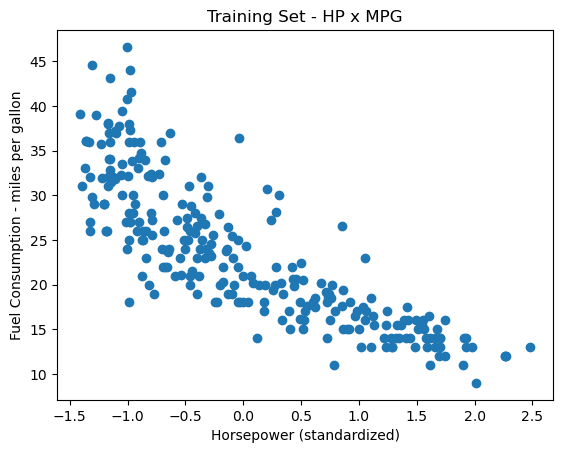

In [158]:
import matplotlib.pyplot as plt
plt.scatter(train_single_feature_pt, train_target_pt)
plt.xlabel('Horsepower (standardized)')
plt.ylabel('Fuel Consumption - miles per gallon')
plt.title('Training Set - HP x MPG')

### 3.4.6 TensorDataset

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step4.png)

<span style="color:red">

In [161]:
from torch.utils.data import TensorDataset

train_ds = TensorDataset(train_single_feature_pt, train_target_pt)

In [162]:
train_ds[:5]

(tensor([[-8.7263e-05],
         [ 2.8327e-01],
         [ 8.6497e-01],
         [-1.7748e-01],
         [ 3.2359e-01]]),
 tensor([[18.0000],
         [28.1000],
         [19.4000],
         [20.3000],
         [20.2000]]))

In [165]:
val_ds = TensorDataset(standardized_data['val'][:, [hp_idx]], 
                       torch.as_tensor(val[['mpg']].values, dtype=torch.float32))

test_ds = TensorDataset(standardized_data['test'][:, [hp_idx]], 
                        torch.as_tensor(test[['mpg']].values, dtype=torch.float32))

## 3.5 DataLoaders

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step5.png)

In [166]:
from torch.utils.data import DataLoader

generator = torch.Generator()
train_loader = DataLoader(dataset=train_ds, batch_size=32, drop_last=True, shuffle=True, generator=generator)

# Sets the seed of the sampler's generator
train_loader.sampler.generator.manual_seed(13)

In [167]:
batch_features, batch_targets = next(iter(train_loader))
batch_features, batch_targets

(tensor([[-1.1450],
         [ 0.5136],
         [-0.9550],
         [-0.4631],
         [-0.8410],
         [ 1.4110],
         [-1.1704],
         [ 2.2702],
         [-0.9838],
         [ 0.7244],
         [-0.4747],
         [-0.6901],
         [-1.2867],
         [ 1.6563],
         [-0.3733],
         [-0.9895],
         [ 1.7047],
         [ 0.7924],
         [-0.6785],
         [ 2.2656],
         [-1.1623],
         [-1.2061],
         [-0.0450],
         [ 1.6966],
         [-0.4597],
         [-0.0393],
         [-1.3697],
         [-0.3042],
         [-0.1337],
         [-0.5403],
         [-0.3871],
         [ 1.1184]]),
 tensor([[32.0000],
         [20.5000],
         [30.0000],
         [20.0000],
         [23.0000],
         [14.0000],
         [38.1000],
         [12.0000],
         [37.3000],
         [18.0000],
         [25.0000],
         [30.0000],
         [29.0000],
         [13.0000],
         [24.0000],
         [36.0000],
         [13.0000],
         [17.0000]

In [73]:
val_loader = DataLoader(dataset=val_ds, batch_size=32, drop_last=True)
test_loader = DataLoader(dataset=test_ds, batch_size=32, drop_last=True)